# Sentiment Analysis of Element Coffee Shop Reviews

In [6]:
import os.path
import requests
import pickle

from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

%matplotlib inline

In [3]:
# Mrauhut/
from googleapiclient import sample_tools
from googleapiclient.http import build_http
import sys
import json
import pandas as pd
import csv
from pandas.io.json import json_normalize
from datetime import datetime, timedelta

### Obtain Data with Google Business API

In [ ]:
!python -m http.server 8000

In [5]:
 # Use the discovery doc to build a service that we can use to make
    # MyBusiness API calls, and authenticate the user so we can access their
    # account
    service, flags = sample_tools.init("mybusiness", "v4", __doc__, __file__, 
                                       scope="https://www.googleapis.com/auth/business.manage", 
                                       discovery_filename=discovery_doc)

NameError: name '__file__' is not defined

## developer docs for google drive API

In [2]:
# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/business.manage']

In [6]:
creds = None
# The file token.pickle stores the user's access and refresh tokens, and is
# created automatically when the authorization flow completes for the first
# time.
if os.path.exists('token.pickle'):
    with open('token.pickle') as token:
        creds = pickle.load(token)
# If there are no (valid) credentials available, let the user log in.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
        creds=flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.pickle', 'wb') as token:
            pickle.dump(creds, token)
    
    service = build('mybusiness', 'v4', credentials=creds)
    
    # Call the gmb v4 API
    results = f'https://mybusiness.googleapis.com/v4/accounts/{accountId}/locations/{locationId}/reviews?pageSize=50'
    
    if not results:
        print('No files found.')
    else:
        print(results.txt)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=634188717068-unqb3q8t0is3e7nnc2gch1ljd9so0etj.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A56743%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbusiness.manage&state=7vcBGDmCOFLxaNrIcDOEAKGuEE1NkD&access_type=offline


HttpError: <HttpError 403 when requesting https://mybusiness.googleapis.com/$discovery/rest?version=v4 returned "The request is missing a valid API key.">

## Accessing Data with google Auth 2.0 Playground:

In [67]:
# Cell missing data intentionally
URI = f'https://mybusiness.googleapis.com/v4/accounts/
r = requests.get(URI, headers=headers)

r.status_code

SyntaxError: EOL while scanning string literal (<ipython-input-67-bf47162d4779>, line 2)

In [18]:
result = r.json()
result

200

In [20]:
df1 = pd.DataFrame(result['reviews'])

In [28]:
# Cell missing data intentionally

headers = {'Authorization': ''
}
URI = f'https://mybusiness.googleapis.com/v4/accounts//locations//reviews?pageToken={result['pageToken']}'
r = requests.get(URI, headers=headers)
r.status_code



In [26]:
result = r.json()
result

dict_values([[{'reviewId': 'AIe9_BFL0OZrFaHgoJtqifT1GHrIjTXWiSjNZvpGing97-GDAxtJvDNRbUSQLn4ZSTVR2DNPr2TOPoboeY0D1u-Lqan91Ay56s1F3XfQk6oHoVyYXZ3NhPM', 'reviewer': {'profilePhotoUrl': 'https://lh3.googleusercontent.com/-LUL_U6xRumk/AAAAAAAAAAI/AAAAAAAAAAA/AMZuuclP9hlLc8Khjg29XWthHiU9HvrvUQ/c0x00000000-cc-rp/photo.jpg', 'displayName': 'Loren Jordan'}, 'starRating': 'FIVE', 'comment': 'Fantastic coffee but been closed since covid.  Rumour is they won the lotto and retired in Caribbean.', 'createTime': '2020-09-13T19:30:58.215Z', 'updateTime': '2020-09-13T19:30:58.215Z', 'name': 'accounts/103081671806813149550/locations/10162385833102214158/reviews/AIe9_BFL0OZrFaHgoJtqifT1GHrIjTXWiSjNZvpGing97-GDAxtJvDNRbUSQLn4ZSTVR2DNPr2TOPoboeY0D1u-Lqan91Ay56s1F3XfQk6oHoVyYXZ3NhPM'}, {'reviewId': 'AIe9_BH-Y7Lwr6IxuH7aUb2G6RG2IMPCd3mi-DY1Ws9ehxhvsoXE0sr4ArxXiawM4WK33wstlK86AoNXPDACKB2WSQEyOo8rSIOHvoZYeVlPt0mcqXbRB_g', 'reviewer': {'profilePhotoUrl': 'https://lh3.googleusercontent.com/a-/AOh14GikMkHtFBSUdr3

In [ ]:

df2 = pd.DataFrame(result['reviews'])
df2

In [31]:
df1.set_index('reviewId', inplace=True)

In [32]:
df1.head()

,reviewer,starRating,comment,createTime,updateTime,name,reviewReply
reviewId,,,,,,,
AIe9_BFL0OZrFaHgoJtqifT1GHrIjTXWiSjNZvpGing97-GDAxtJvDNRbUSQLn4ZSTVR2DNPr2TOPoboeY0D1u-Lqan91Ay56s1F3XfQk6oHoVyYXZ3NhPM,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Fantastic coffee but been closed since covid. ...,2020-09-13T19:30:58.215Z,2020-09-13T19:30:58.215Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BH-Y7Lwr6IxuH7aUb2G6RG2IMPCd3mi-DY1Ws9ehxhvsoXE0sr4ArxXiawM4WK33wstlK86AoNXPDACKB2WSQEyOo8rSIOHvoZYeVlPt0mcqXbRB_g,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Really good coffee. Very passionate about what...,2020-09-10T21:06:15.054Z,2020-09-10T21:06:15.054Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BGErQpX2pRNZrXBy5NOsH0eCtyW3yibiPBG4weYMP1ri4sBHwriGroq6dhqbR1gz6D-Zhi3kbMxgHSw5T7gbCgyXhAdEMbAnwmoNFrpQWyPQ44iN-I,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Lovely place to relax and have a coffee. They ...,2020-08-20T07:42:04.657Z,2020-08-20T07:42:04.657Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BGErQpX2pRNZrXBy5NOsH0eDADH6rBJaxaNqCKygzY5qaYWyFVViM8HXFAQca2iTsg7wvPUKp_OkQTHEpgjoe3QwPuuqm3nJZBR-AFGF4-IuiNVs5o,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Staff are some of the most interesting and fri...,2020-08-17T18:23:04.249Z,2020-08-17T18:23:04.249Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BHAFUK2tNBZL25dLQ0jVdh0N0OM7D0pqpTx4hEPEOmFKBF8LM05IqfxpkYnTaQmS-5791oAFKPesebFHNgo_dAabd9C_iFwqV9XT2lgYUJwR1UfwZc,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Absolutely love this place! The staff is great...,2020-08-16T11:12:35.362Z,2020-08-16T11:12:35.362Z,accounts/103081671806813149550/locations/10162...,NaN


In [33]:
df2.set_index('reviewId', inplace=True)
df2.head()

,reviewer,starRating,createTime,updateTime,name,comment,reviewReply
reviewId,,,,,,,
AIe9_BGErQpX2pRNZrXBy5NOsH0epxmheIBJ8MOH7FjO5T_ApAS2vgHXqy2PrqyzDmobb9rzAoronD7uzm0zWqlDwqW_bdW8NLvRqYRQkOn-xq0Qb74mRp4,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,2019-08-13T16:06:55.055Z,2019-08-13T16:06:55.055Z,accounts/103081671806813149550/locations/10162...,NaN,NaN
AIe9_BFLHEJ8hYqd4VCbbc-EtvgMrQM6fXxLqa_9I40x_CFV2tgYMNEH_Llz47xGT3Kq5hXs04H0JI_G2J72TELlRwFkrUTCSCYJUhoFihq3dCVnsG9753c,{'profilePhotoUrl': 'https://lh3.googleusercon...,FOUR,2019-08-09T16:53:15.488Z,2019-08-09T16:53:15.488Z,accounts/103081671806813149550/locations/10162...,Good coffee,NaN
AIe9_BG6xadHFAZSK79zWz9bVMwy_YUUotrBsO1pOBB7_TR5YQj1OKuafAcabmiU6bPIesCrShWIoYFG7jEVmyBvBDbzBwDJaATsTcCrcUWxG1V6GDY3F7g,{'profilePhotoUrl': 'https://lh6.googleusercon...,FIVE,2019-08-08T10:33:25.403Z,2019-08-08T10:33:25.403Z,accounts/103081671806813149550/locations/10162...,"Great people, delicious single origin coffee, ...",NaN
AIe9_BFmRFRFwJGRfUDOW8jG3rXnSPe23GNMYAFfMUK-6Rkoe8l7dN1nkYJpPdNgG_HmvNW1k8PYXRmZ_6i1mQFSbc9dcZOQjllIbXFzanRYEnGuhC4SvCg,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,2019-08-07T19:50:49.374Z,2019-08-07T19:50:49.374Z,accounts/103081671806813149550/locations/10162...,If you want people passionate about coffee...t...,NaN
AIe9_BHkHJRvhG8n5BjqdcMSKR_FpJt21OuPmrdJ6SU-1B6kCTfTiq-yAJOmdtv1fhU2r4kmd2q15AcAW6FPaCjO-CuvvXkcVpzvtYlqM_3gQwyd_qdWIXw,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,2019-08-02T15:53:08.316Z,2019-08-02T15:53:08.316Z,accounts/103081671806813149550/locations/10162...,This super cozy coffee place is a Community me...,NaN


In [37]:
df = pd.concat((df1, df2), axis=0, sort=False)

In [47]:
df.sort_values(by='createTime', axis=0, inplace=True)

In [48]:
df

,reviewer,starRating,comment,createTime,updateTime,name,reviewReply
reviewId,,,,,,,
AIe9_BHVBnWjBJvk55vq2QEm0wl-8UCzjr_bRvhzYUTeRseNIi9_2-7iTjGKMginc7TlhB_nh7xqRNwVKhqi8BzSgYZEVJprFgvvEBIWLsEyKpl2JM9wpFk,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,NaN,2019-03-02T11:14:14.423Z,2019-03-02T11:14:14.423Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BG84YPnR8vhxeJfV_lAYVNiyJklgjDvK2mToyGAnm5BLKXD0Nof7c3scJiNsgQwiPIldOQxZH0YSEruf1oe2D7BfTjfNguuZIhasMZG_eyP7pIHjT8,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Incredibly cosy and frieindly atmosphere with ...,2019-03-02T14:04:06.497Z,2019-03-02T14:04:06.497Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BG84YPnR8vhxeJfV_lAYVNieyl3sfiZ-Bg2Obdo5eL_wNbFTBw2gOkQTCc81PPhN39uVaLFRZUh12Ow6KCkMq1eEOOMft5_T-iFG3UJ3pwBdCmamxY,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,"Great coffee, and the red velvet cake was quic...",2019-03-02T15:44:56.985Z,2019-03-02T15:44:56.985Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BFFcAiX3_kRXfnRLgvL31Hr4E8x9TEaJTu1BoILutMXL9pbQgcA5OBsdQYAMiQYNVpG9ukjMu7WsnNlzMg0e2xaa9fYHfOJX02NSGA8jjeaCh4LtOI,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,"Great coffee. Excellent service, went during t...",2019-03-02T15:58:31.612Z,2019-03-02T15:58:31.612Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BG84YPnR8vhxeJfV_lAYVNi6EcIvkUtR__HCm0Tp3QYtjrY8ijyuAo6KcAztBS7bpw_ufr1W34-K6FC9c2qUqEVMWshoeydKJl88Nj73-cInEQvDLk,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Cozy with delicious food! Tried the charcoal ...,2019-03-02T16:08:02.908Z,2019-03-02T16:08:02.908Z,accounts/103081671806813149550/locations/10162...,NaN
...,...,...,...,...,...,...,...
AIe9_BHAFUK2tNBZL25dLQ0jVdh0N0OM7D0pqpTx4hEPEOmFKBF8LM05IqfxpkYnTaQmS-5791oAFKPesebFHNgo_dAabd9C_iFwqV9XT2lgYUJwR1UfwZc,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Absolutely love this place! The staff is great...,2020-08-16T11:12:35.362Z,2020-08-16T11:12:35.362Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BGErQpX2pRNZrXBy5NOsH0eDADH6rBJaxaNqCKygzY5qaYWyFVViM8HXFAQca2iTsg7wvPUKp_OkQTHEpgjoe3QwPuuqm3nJZBR-AFGF4-IuiNVs5o,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Staff are some of the most interesting and fri...,2020-08-17T18:23:04.249Z,2020-08-17T18:23:04.249Z,accounts/103081671806813149550/locations/10162...,NaN
AIe9_BGErQpX2pRNZrXBy5NOsH0eCtyW3yibiPBG4weYMP1ri4sBHwriGroq6dhqbR1gz6D-Zhi3kbMxgHSw5T7gbCgyXhAdEMbAnwmoNFrpQWyPQ44iN-I,{'profilePhotoUrl': 'https://lh3.googleusercon...,FIVE,Lovely place to relax and have a coffee. They ...,2020-08-20T07:42:04.657Z,2020-08-20T07:42:04.657Z,accounts/103081671806813149550/locations/10162...,NaN


In [56]:
df.reset_index(inplace=True)

In [59]:
df.drop(columns=['reviewId', 'reviewReply', 'updateTime', 'reviewer'], inplace=True)

KeyError: "['reviewId' 'reviewReply' 'updateTime' 'reviewer'] not found in axis"

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
starRating    100 non-null object
comment       76 non-null object
createTime    100 non-null object
name          100 non-null object
dtypes: object(4)
memory usage: 3.2+ KB


In [66]:
pd.to_datetime(df['createTime'])
df

,starRating,comment,createTime,name
0,FIVE,NaN,2019-03-02T11:14:14.423Z,accounts/103081671806813149550/locations/10162...
1,FIVE,Incredibly cosy and frieindly atmosphere with ...,2019-03-02T14:04:06.497Z,accounts/103081671806813149550/locations/10162...
2,FIVE,"Great coffee, and the red velvet cake was quic...",2019-03-02T15:44:56.985Z,accounts/103081671806813149550/locations/10162...
3,FIVE,"Great coffee. Excellent service, went during t...",2019-03-02T15:58:31.612Z,accounts/103081671806813149550/locations/10162...
4,FIVE,Cozy with delicious food! Tried the charcoal ...,2019-03-02T16:08:02.908Z,accounts/103081671806813149550/locations/10162...
...,...,...,...,...
95,FIVE,Absolutely love this place! The staff is great...,2020-08-16T11:12:35.362Z,accounts/103081671806813149550/locations/10162...
96,FIVE,Staff are some of the most interesting and fri...,2020-08-17T18:23:04.249Z,accounts/103081671806813149550/locations/10162...
97,FIVE,Lovely place to relax and have a coffee. They ...,2020-08-20T07:42:04.657Z,accounts/103081671806813149550/locations/10162...
98,FIVE,Really good coffee. Very passionate about what...,2020-09-10T21:06:15.054Z,accounts/103081671806813149550/locations/10162...


In [202]:
df['createTime'] = pd.to_datetime(df['createTime'])
df

,index,starRating,comment,createTime,name
0,1,FIVE,Incredibly cosy and frieindly atmosphere with ...,2019-03-02 14:04:06.497000+00:00,accounts/103081671806813149550/locations/10162...
1,2,FIVE,"Great coffee, and the red velvet cake was quic...",2019-03-02 15:44:56.985000+00:00,accounts/103081671806813149550/locations/10162...
2,3,FIVE,"Great coffee. Excellent service, went during t...",2019-03-02 15:58:31.612000+00:00,accounts/103081671806813149550/locations/10162...
3,4,FIVE,Cozy with delicious food! Tried the charcoal ...,2019-03-02 16:08:02.908000+00:00,accounts/103081671806813149550/locations/10162...
4,5,FIVE,I hate coffee but this place offers great tea ...,2019-03-02 16:43:07.317000+00:00,accounts/103081671806813149550/locations/10162...
...,...,...,...,...,...
71,95,FIVE,Absolutely love this place! The staff is great...,2020-08-16 11:12:35.362000+00:00,accounts/103081671806813149550/locations/10162...
72,96,FIVE,Staff are some of the most interesting and fri...,2020-08-17 18:23:04.249000+00:00,accounts/103081671806813149550/locations/10162...
73,97,FIVE,Lovely place to relax and have a coffee. They ...,2020-08-20 07:42:04.657000+00:00,accounts/103081671806813149550/locations/10162...
74,98,FIVE,Really good coffee. Very passionate about what...,2020-09-10 21:06:15.054000+00:00,accounts/103081671806813149550/locations/10162...


### Preprocessing for nlp

In [68]:
reviews = df.comment

In [70]:
reviews.dropna(inplace=True)

In [74]:
reviews = list(reviews)
reviews

["Incredibly cosy and frieindly atmosphere with the best coffee and cakes I've had! Definitely my new favourite place to go",
 'Great coffee, and the red velvet cake was quickly devoured by myself and the missus. Will be back very soon',
 'Great coffee. Excellent service, went during their opening and they were raising money for Mind. Overall nice vibe would visit again.',
 "Cozy with delicious food!  Tried the charcoal bun salami and truffler cheese and salad.  Staff are friendly and service is fast.  I loved the Pathfinder blend coffee, and the cheese and salami were very tasty.  I'd recommend this as a good place for a lazy Saturday to drink a coffee and people watch.  Will certainly be back soon!",
 'I hate coffee but this place offers great tea and food. I was having a bad day, but this place was exactly what I needed to cheer me up. The owners are really lovely, grew up in the area and warm. Highly recommend.',
 'Amazing coffee and brownie, lovely owners and atmosphere!',
 'Very 

### NLP Sentiment-Analysis with Transformers Library

In [76]:
classifier = pipeline("sentiment-analysis")

In [84]:
results = classifier(reviews)
# def nlp_labels(results):
#     nlp_results = []
#     for result in results:
#         nlp_results.append(f"label: {result['label']}, with score: {round(result['score'], 4)}")
#     return nlp_results
# review_labels = nlp_labels(results)

In [110]:
# review_labels # maybe make these dict? to be able to make a df out of it?
nlp_results_df = pd.DataFrame(results)

In [93]:
# nlp_df = df.dropna(how='any', subset=['comment'], inplace=True)

In [107]:
df.shape # the right shape for the df to take nlp results is 76, 4

(76, 4)

In [148]:
nlp_results_df.reset_index(inplace=True)

In [144]:
df.reset_index(inplace=True)

In [155]:
nlp_results_df.drop(columns='index', inplace=True)

In [156]:
final_df = df.join(nlp_results_df)

In [204]:
final_df['createTime'] = pd.to_datetime(final_df['createTime']).dt.date

In [205]:
final_df

,index,starRating,comment,createTime,name,label,score
0,1,FIVE,Incredibly cosy and frieindly atmosphere with ...,2019-03-02,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999793
1,2,FIVE,"Great coffee, and the red velvet cake was quic...",2019-03-02,accounts/103081671806813149550/locations/10162...,POSITIVE,0.996087
2,3,FIVE,"Great coffee. Excellent service, went during t...",2019-03-02,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999741
3,4,FIVE,Cozy with delicious food! Tried the charcoal ...,2019-03-02,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999793
4,5,FIVE,I hate coffee but this place offers great tea ...,2019-03-02,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999868
...,...,...,...,...,...,...,...
71,95,FIVE,Absolutely love this place! The staff is great...,2020-08-16,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999882
72,96,FIVE,Staff are some of the most interesting and fri...,2020-08-17,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999870
73,97,FIVE,Lovely place to relax and have a coffee. They ...,2020-08-20,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999735
74,98,FIVE,Really good coffee. Very passionate about what...,2020-09-10,accounts/103081671806813149550/locations/10162...,POSITIVE,0.999881


In [206]:
final_df.loc[final_df['label'] == 'NEGATIVE']

,index,starRating,comment,createTime,name,label,score
29,37,ONE,Awful coffee and rude staff. Never again,2019-06-26,accounts/103081671806813149550/locations/10162...,NEGATIVE,0.999407
40,50,FIVE,"Just great, but tiny, so please don't tell anyone",2019-08-15,accounts/103081671806813149550/locations/10162...,NEGATIVE,0.590078
66,88,ONE,"The worst, most overpriced coffee in Ealing.",2020-03-04,accounts/103081671806813149550/locations/10162...,NEGATIVE,0.999781
75,99,FIVE,Fantastic coffee but been closed since covid. ...,2020-09-13,accounts/103081671806813149550/locations/10162...,NEGATIVE,0.826600


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0., 74.]),
 array([0.59007847, 0.63105941, 0.67204036, 0.7130213 , 0.75400224,
        0.79498318, 0.83596412, 0.87694506, 0.917926  , 0.95890694,
        0.99988788]),
 <a list of 10 Patch objects>)

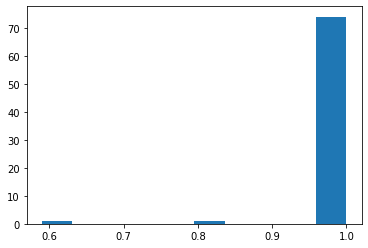

In [207]:
plt.hist(final_df['score'])

(array([72.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

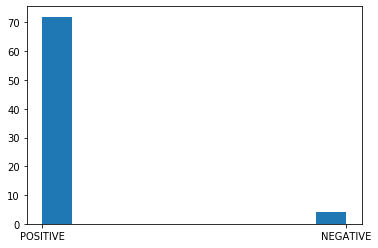

In [171]:
plt.hist(final_df['label'])
plt.title

(array([71.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

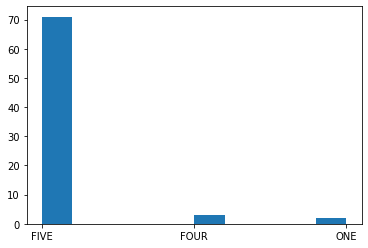

In [175]:
plt.hist(final_df['starRating'])

Text(0, 0.5, 'Review Score')

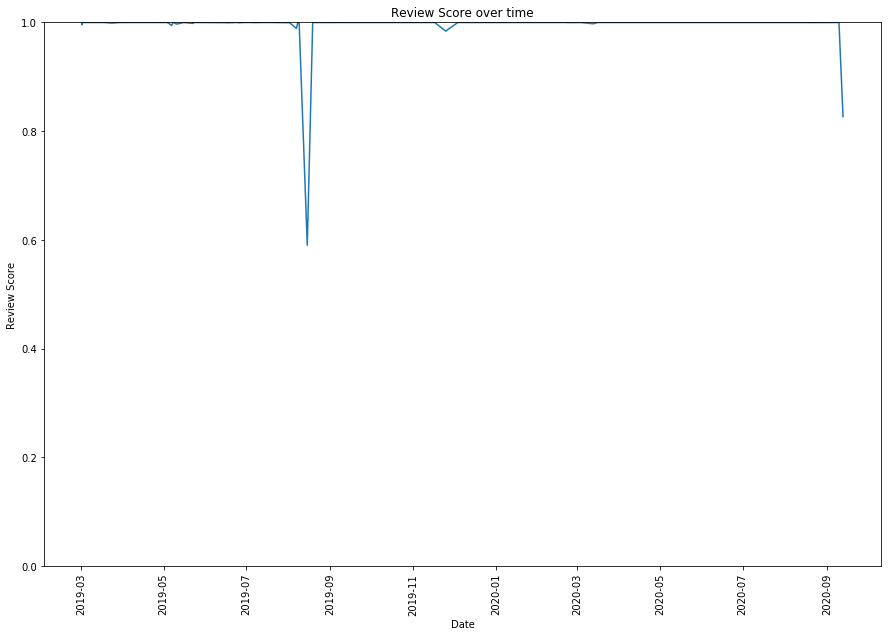

In [244]:
plt.figure(figsize=(15,10))
plt.plot(final_df['createTime'], final_df['score'])
plt.title('Review Score over time')
plt.xticks(rotation=90)
plt.ylim(0, 1)
plt.xlabel("Date")
plt.ylabel("Review Score")

In [172]:
results

[{'label': 'POSITIVE', 'score': 0.9997926354408264},
 {'label': 'POSITIVE', 'score': 0.9960873126983643},
 {'label': 'POSITIVE', 'score': 0.9997410774230957},
 {'label': 'POSITIVE', 'score': 0.9997931718826294},
 {'label': 'POSITIVE', 'score': 0.9998675584793091},
 {'label': 'POSITIVE', 'score': 0.9998859167098999},
 {'label': 'POSITIVE', 'score': 0.9998655319213867},
 {'label': 'POSITIVE', 'score': 0.9998761415481567},
 {'label': 'POSITIVE', 'score': 0.9998875260353088},
 {'label': 'POSITIVE', 'score': 0.9998487830162048},
 {'label': 'POSITIVE', 'score': 0.9998602867126465},
 {'label': 'POSITIVE', 'score': 0.9998408555984497},
 {'label': 'POSITIVE', 'score': 0.9987800717353821},
 {'label': 'POSITIVE', 'score': 0.9997385144233704},
 {'label': 'POSITIVE', 'score': 0.9998398423194885},
 {'label': 'POSITIVE', 'score': 0.9998830556869507},
 {'label': 'POSITIVE', 'score': 0.9998809695243835},
 {'label': 'POSITIVE', 'score': 0.9998055696487427},
 {'label': 'POSITIVE', 'score': 0.999848306179

In [179]:
np.mean(final_df['score'].where(final_df['label']=='POSITIVE'))

0.9992185019784503

In [180]:
np.mean(final_df['score'].where(final_df['label']=='NEGATIVE'))

0.8539668023586273

In [188]:
df['starRating'].value_counts()

FIVE    71
FOUR     3
ONE      2
Name: starRating, dtype: int64

In [218]:
final_df['comment'].where(final_df['score'] < 0.8)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
71    NaN
72    NaN
73    NaN
74    NaN
75    NaN
Name: comment, Length: 76, dtype: object

## Wordcloud generation with Wordcloud:

In [240]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

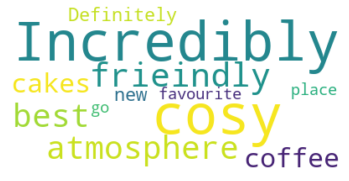

In [245]:
# Start with one review:
text = final_df.comment[0]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [247]:
# save file as png
wordcloud.to_file("img/first_review.png")

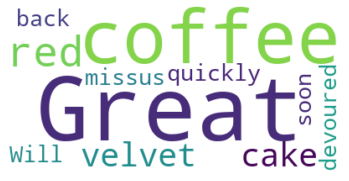

In [248]:
# take second review for example purposes:
text = final_df.comment[1]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [249]:
wordcloud.to_file("img/second_review.png")

## All reviews

In [256]:
text = " ".join(review for review in final_df.comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 9683 words in the combination of all review.


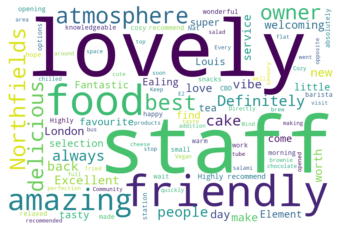

In [283]:
stopwords = set(STOPWORDS)
stopwords.update(["coffee", "want", "nice", "go", "will", "shop", "drink", "now", "cafe", "great", "place", "good", "really"])

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white",width=1080, height = 720).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [284]:
wordcloud.to_file("img/all_review_no_coffee.png")

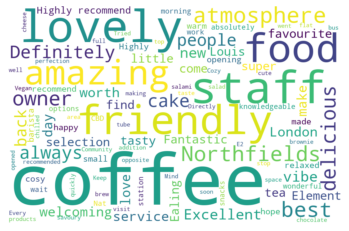

In [279]:
stopwords = set(STOPWORDS)
stopwords.update(["want", "nice", "go", "will", "shop", "drink", "now", "cafe", "great", "place", "good", "really"])

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white", width=1080, height = 720).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear", aspect='auto')
plt.axis("off")
plt.show()

In [280]:
wordcloud.to_file("img/all_reviews_adjusted.png")

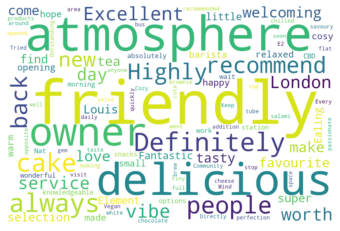

In [281]:
stopwords = set(STOPWORDS)
stopwords.update(["best", "amazing", "Northfields","coffee", "food", "staff", "lovely", "want", "nice", "go", "will", "shop", "drink", "now", "cafe", "great", "place", "good", "really"])

# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white", width=1080, height = 720).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [282]:
wordcloud.to_file("img/all_reviews_final.png")

In [287]:
final_df.drop(columns='name', inplace=True)